## Getting started with python
* First, lets get started by making sure we are using matplotlib in "inline" mode
* The "%" here means this is a "magic function" in iPython, where jupyter is sort of built on iPython, and iPython is the "interactive" form of python.  Here a "magic function" is sort of like a command line call, i.e. a call in python that does not rely on using python syntax
* All that the "inline" is saying is please present the images generated with matplotlib in the actual notebook, don't try to save them somwhere else

In [77]:
%matplotlib inline

## Import matplotlib stuffs
* ok, so now we are doing the actual importing of libraries
* matplotlib is sort of a generic plotting library
* matplotlib.pyplot is a list of plotting routines, and you'll often see it short-handed as plt
* And here we are just setting the kind of font we want to use

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import datetime
#matplotlib.rcParams["font.family"] = "Questrial" # note, could also use like "sans-serif" others, just google
matplotlib.rcParams["font.family"] = "sans-serif" # note, could also use like "sans-serif" others, just google

## Import numpy
* now, lets import numpy, usually shorthanded as "np"
* this is a set of tools that allows for array manipulation - remember that Python natively does things as lists, and numpy allows for mathematical operations with arrays, like multiplying and adding arrays for example

In [79]:
import numpy as np

## Getting on with it!
* now, lets generate some data to make some plots with
* lets check out that FRED data we were looking at before

| Date | GDP in Billions of $ |
| ---- | -- |
| 2007-01-01 | 14233.2 |
| 2007-04-01 | 14422.3 |
| 2007-07-01 | 14569.7 |
| 2007-10-01 | 14685.3 |
| 2008-01-01 | 14668.4 |
| 2008-04-01 | 14813.0 |
| 2008-07-01 | 14843.0 |
| 2008-10-01 | 14549.9 |
| 2009-01-01 | 14383.9 |


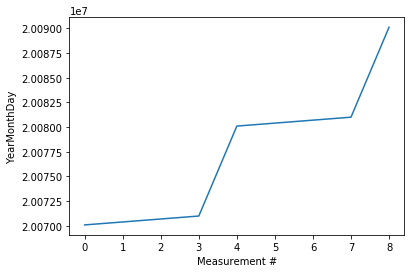

In [80]:
# lets put our time delimer in units of YEAR MONTH DAY, which will naturally sort our data
# *** NOTE: you can copy-paste these into the chat window for online classes to save time ***
#           OR in slack channels for in-person classes
time = [20070101, 20070401, 20070701, 20071001, 20080101, 20080401, 20080701, 20081001, 20090101]
# we can plot this to see this sorting
plt.plot(time)
# and maybe lets put some labels for funzies
plt.xlabel('Measurement #')
plt.ylabel('YearMonthDay')
# so, we can see here that time is monotonically increasing

# now, lets also put in the array of GDPs
gdp = [14233.2, 14422.3, 14569.7, 14685.3, 14668.4, 14813.0, 14843.0, 14549.9, 14383.9]



Text(0, 0.5, 'GDP in Billions')

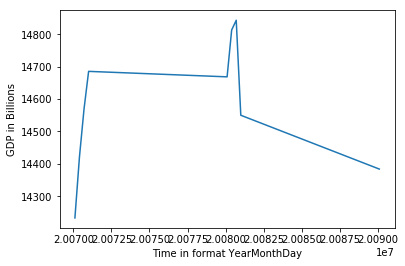

In [81]:
# now, we can do the most basic-est of plots
plt.plot(time, gdp)
plt.xlabel('Time in format YearMonthDay')
plt.ylabel('GDP in Billions')

Text(0, 0.5, 'GDP in Billions')

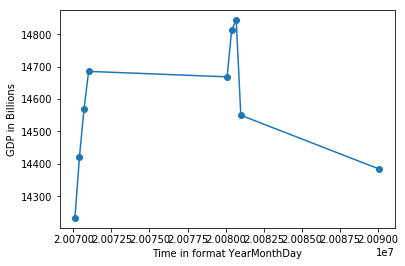

In [82]:
# so, it might be a little hard here to see where the actual measurements are, so lets change things with a marker
plt.plot(time, gdp, 'o-')
plt.xlabel('Time in format YearMonthDay')
plt.ylabel('GDP in Billions')
# cool, much better!

## Using Datetime for dates
* only issue with the above is that it is hard to figure out what dates are what
* we can use the datetime package to format our axis all nice like

In [83]:
from datetime import datetime

date = []
# lets loop through and update our time array
for t in time:
    date.append( datetime.strptime(str(t), '%Y%m%d') )

print(date)

# you can see we get these interesting date-time objects

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 4, 1, 0, 0), datetime.datetime(2007, 7, 1, 0, 0), datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 1, 1, 0, 0), datetime.datetime(2008, 4, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0), datetime.datetime(2008, 10, 1, 0, 0), datetime.datetime(2009, 1, 1, 0, 0)]


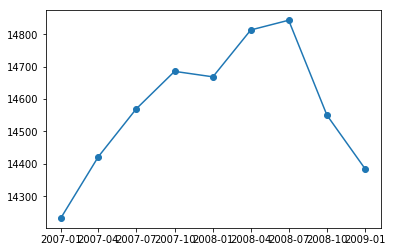

In [84]:
# replot
plt.plot(date,gdp,'o-')
# so we get some dates now on the x-axis, and they are evenly spaced
#  which makes sense since the measurements are at the first of each month, 
#  but they are still a bit hard to read

## Lets think of a different way to visualize this same dataset
* Suppose instead, we want to highlight regions of "low" and "high" GDP
* so, first we have to define what low and high mean

In [85]:
# now, for the sake of plotting, lets split up our data into dates of "high" GDP and dates of "low" GDP
# and those that are just average or in the middle
# first, lets turn our lists into arrays so that we can do this more easily
gdp = np.array(gdp)
date = np.array(date)
#  this is a rather arbitrary split:
gdp_high = 14600.0

# now, lets grab the time min & max for when this occurs
time_high = [(date[gdp >= gdp_high]).min(), (date[gdp >= gdp_high]).max()]

# and same for low
gdp_low = 14300.0
time_low = [(date[gdp <= gdp_low]).min(), (date[gdp <= gdp_low]).max()]

# lets take a quick look at them
print(time_high)
print(time_low)
# alright, but this is sort of hard to see and understand really, lets see if we can do better

[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]
[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]


## Lets now visualize this on a timeline instead of a graph
* we will highlight regions of low and high there

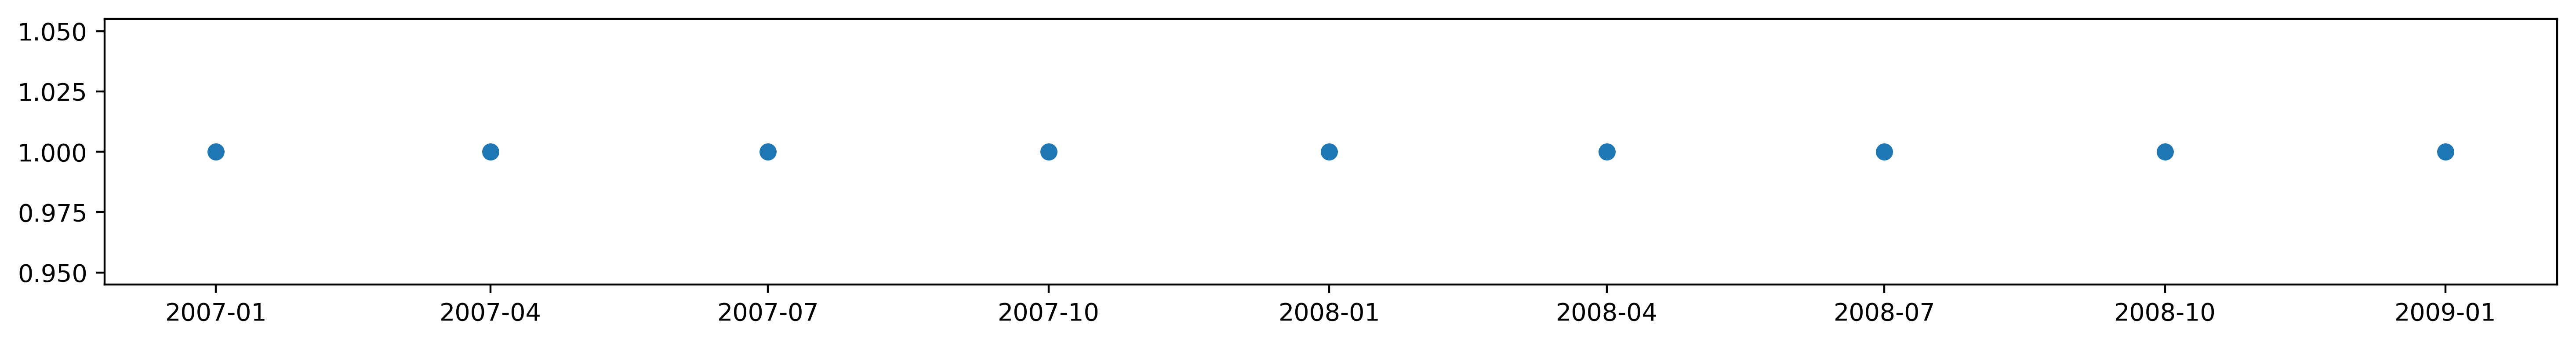

In [87]:
# lets start by making a timeline that shows all the measurements and 
# also the range of low & high GDPs
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# first, lets just make an empty plot
ax.plot(date, [1]*len(date), marker='o', lw=0)
# note: the [1]*len(time) here just plots everything on our timeline at a y-valeu of 1
# lw=0 means no line

plt.show()

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


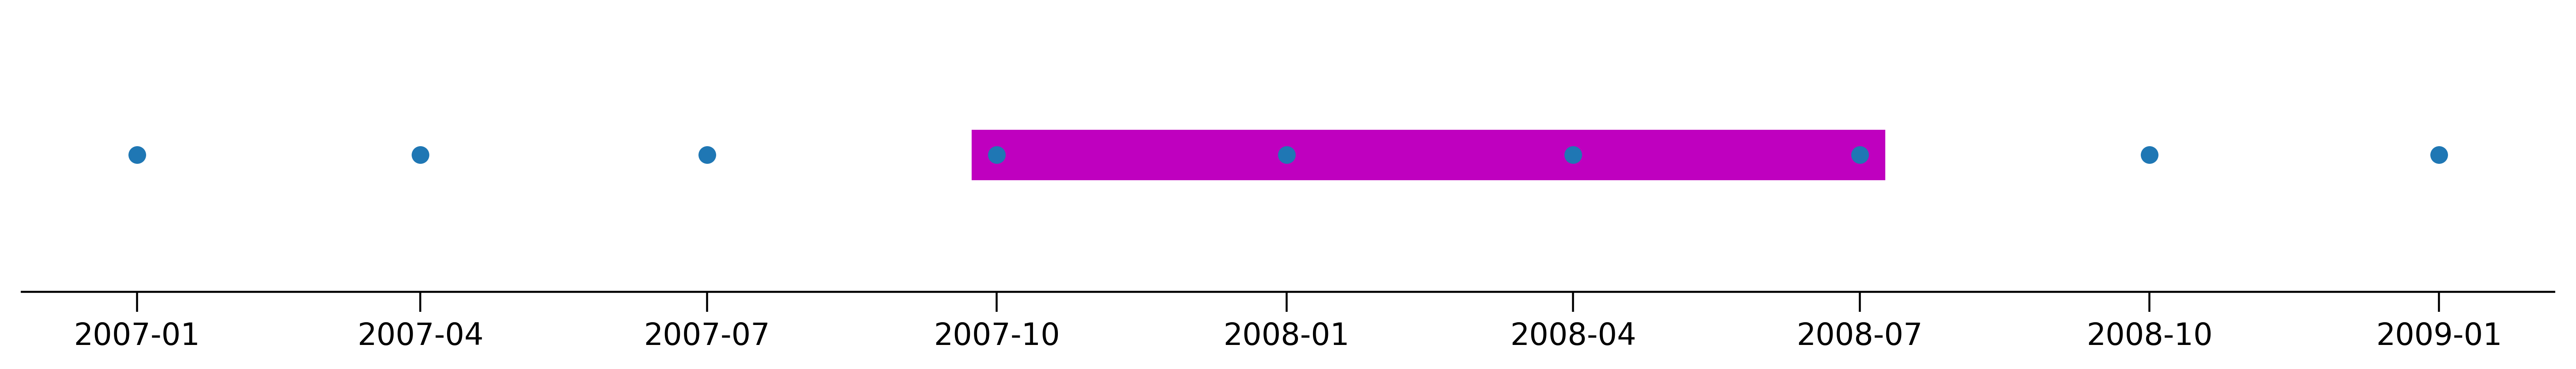

In [90]:
# lets also make some fancy tick labels 
# ****NOTE: do this in-line, i.e. you don't need extra cells for this
#           just re-run this cell after every numbered point

# lets start by making a timeline
fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots

# (1) first, lets just make an empty plot
ax.plot(date, [1]*len(date), marker='o', lw=0)

# lets also make a nicer timeline type plot by turning off things

# (2) take off y-ticks
ax.yaxis.set_visible(False)


# (3) take off axis
ax.spines['right'].set_visible(False) # takes off right y-axis
ax.spines['left'].set_visible(False) # takes off left y-axis
ax.spines['top'].set_visible(False) # takes off the top x-axis

# (4) lets make the tick marks more readable
ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large
#ax.xaxis.set_tick_params(which='minor', size=5) # don't think we need this one

# (5) lets zoom in on our points
ax.set_ylim(0.9, 1.1)

# lovely!

# (6) ok, now, lets plot regions of low and high GDP
# to make this easier, lets do it in a for loop
time_lh = [time_low,time_high]
# this will plot a magenta line
# the zorder just means, plot behind our points
for t in time_lh:
    print(t)
    ax.plot(t, [1]*len(t), c='m', marker='', ls='-', lw=20, solid_joinstyle="bevel",
        solid_capstyle="projecting",zorder=0)

# label x 
###ax.set_xlabel('Date')  # maybe lets not

plt.show()

## So there, are a few things to notice about the above plot.
* first off, there is no point for the low GDP values because this is a single point
* Also, it really looks like the high region is extending outside the time stamps of 2007-07-01 & 2007-08-01, why?

### Lets play around with our plotting routine to find out!

In [103]:
# first, lets make our whole plotting thing into a function so we don't have to mess with things one at a time

# ***copy-paste above cell***

def make_plot(capstyle):
    
    # set up fig
    fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots
    ax.plot(date, [1]*len(date), marker='o', lw=0)

    # axis
    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False) # takes off right y-axis
    ax.spines['left'].set_visible(False) # takes off left y-axis
    ax.spines['top'].set_visible(False) # takes off the top x-axis

    # tick marks more readable
    ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
    ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large

    # zoom in on our points
    ax.set_ylim(0.9, 1.1)

    # regions of low and high GDP
    time_lh = [time_low,time_high]
    # this will plot a magenta line
    # the zorder just means, plot behind our points
    for t in time_lh:
        print(t)
        ax.plot(t, [1]*len(t), c='m', marker='', ls='-', lw=20, solid_joinstyle="bevel",
            solid_capstyle=capstyle,zorder=0) # note: we changed capstyle here to be read in!

    plt.show()

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


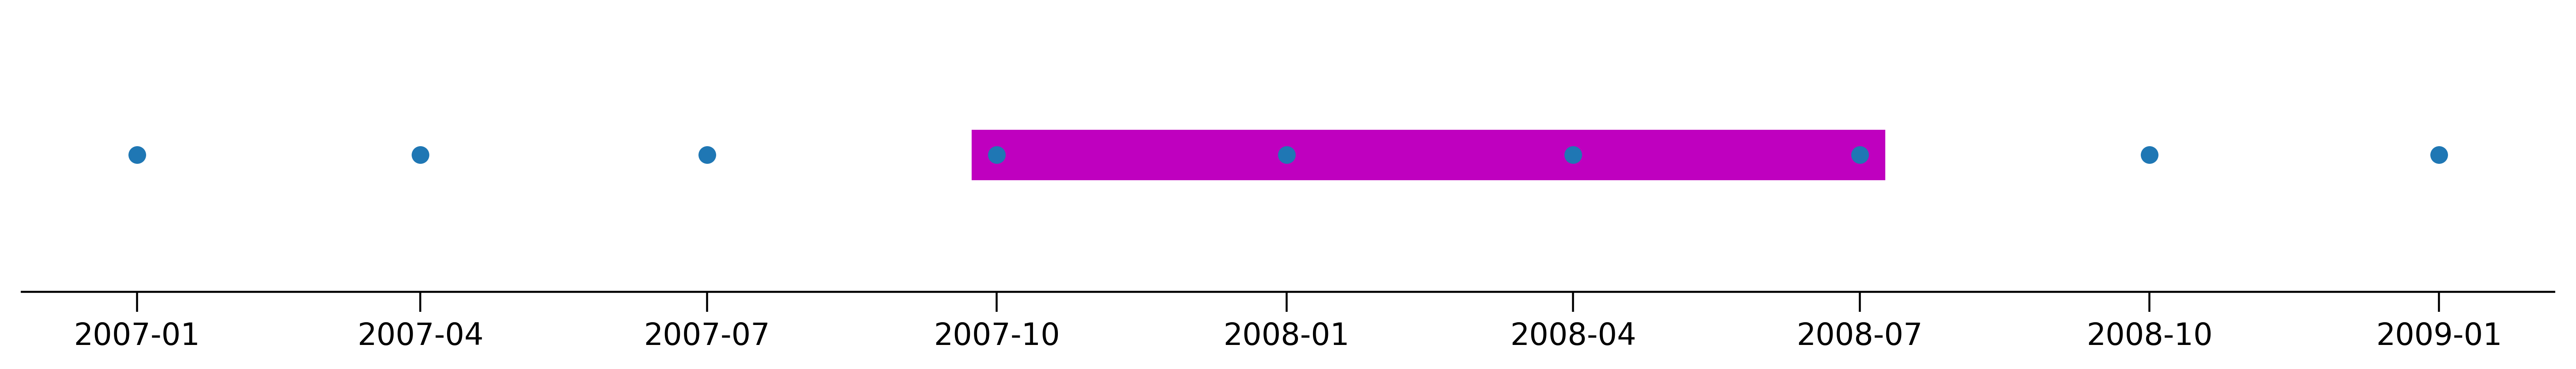

In [104]:
# now, lets make our old plot
make_plot('projecting')

In [107]:
# but I also don't like this blue over magenta, so lets add in a few other options
## **NOTE!! don't need to re-do the function, just edit the one above

def make_plot(capstyle, linecolor='m'):
    
    # set up fig
    fig, ax = plt.subplots(figsize=(18,2), dpi=400) # this is just a fancier way of making plots
    ax.plot(date, [1]*len(date), marker='o', lw=0)

    # axis
    ax.yaxis.set_visible(False)
    ax.spines['right'].set_visible(False) # takes off right y-axis
    ax.spines['left'].set_visible(False) # takes off left y-axis
    ax.spines['top'].set_visible(False) # takes off the top x-axis

    # tick marks more readable
    ax.xaxis.set_ticks_position('bottom') # makes sure axis are on the bottom (default), but just incase
    ax.xaxis.set_tick_params(labelsize='large', size=8) # lets make the labels large

    # zoom in on our points
    ax.set_ylim(0.9, 1.1)

    # regions of low and high GDP
    time_lh = [time_low,time_high]
    # this will plot a magenta line
    # the zorder just means, plot behind our points
    for t in time_lh:
        print(t)
        ax.plot(t, [1]*len(t), c=linecolor, marker='', ls='-', lw=20, solid_joinstyle="bevel",
            solid_capstyle=capstyle,zorder=0) # note: we changed capstyle here to be read in!


    plt.show()

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


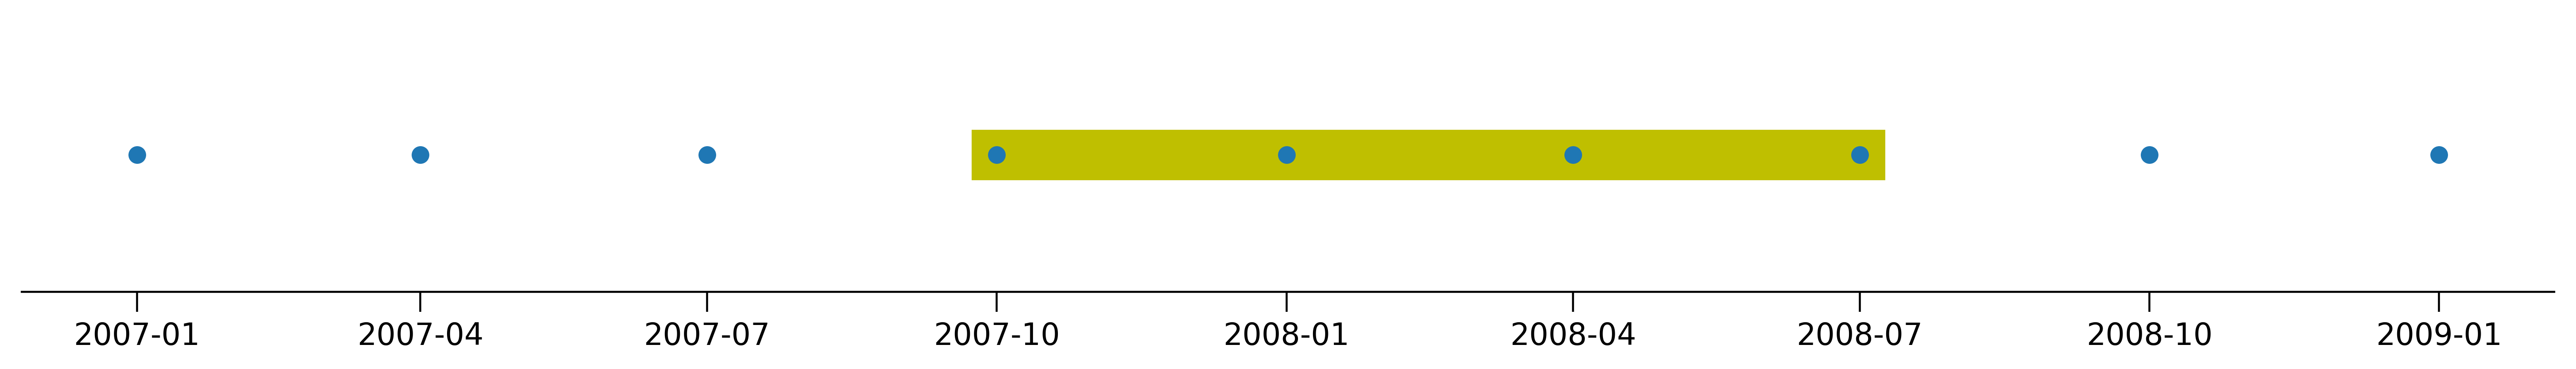

In [108]:
make_plot('projecting', linecolor='y')

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


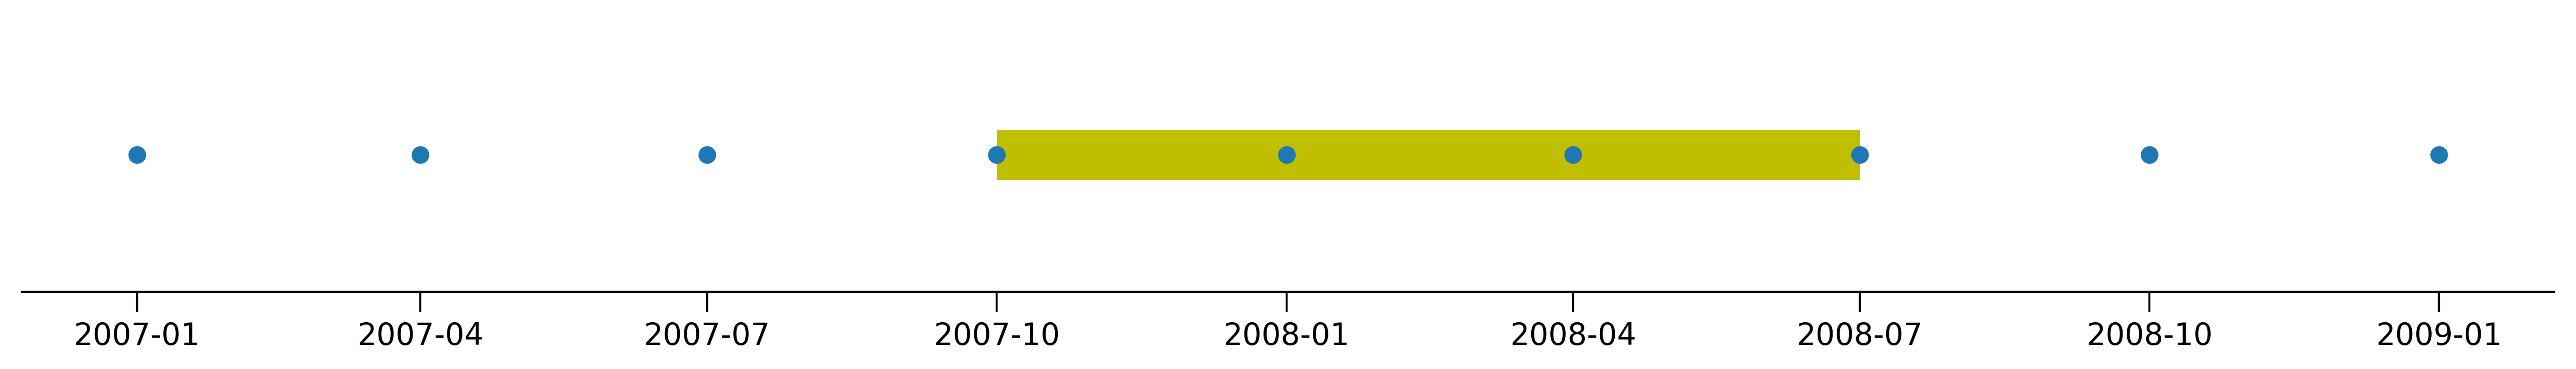

In [109]:
# now, lets look at other types of cap styles for our line
make_plot("butt", linecolor='y')

## Note that now the caps terminate at the measurements

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)]
[datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0)]


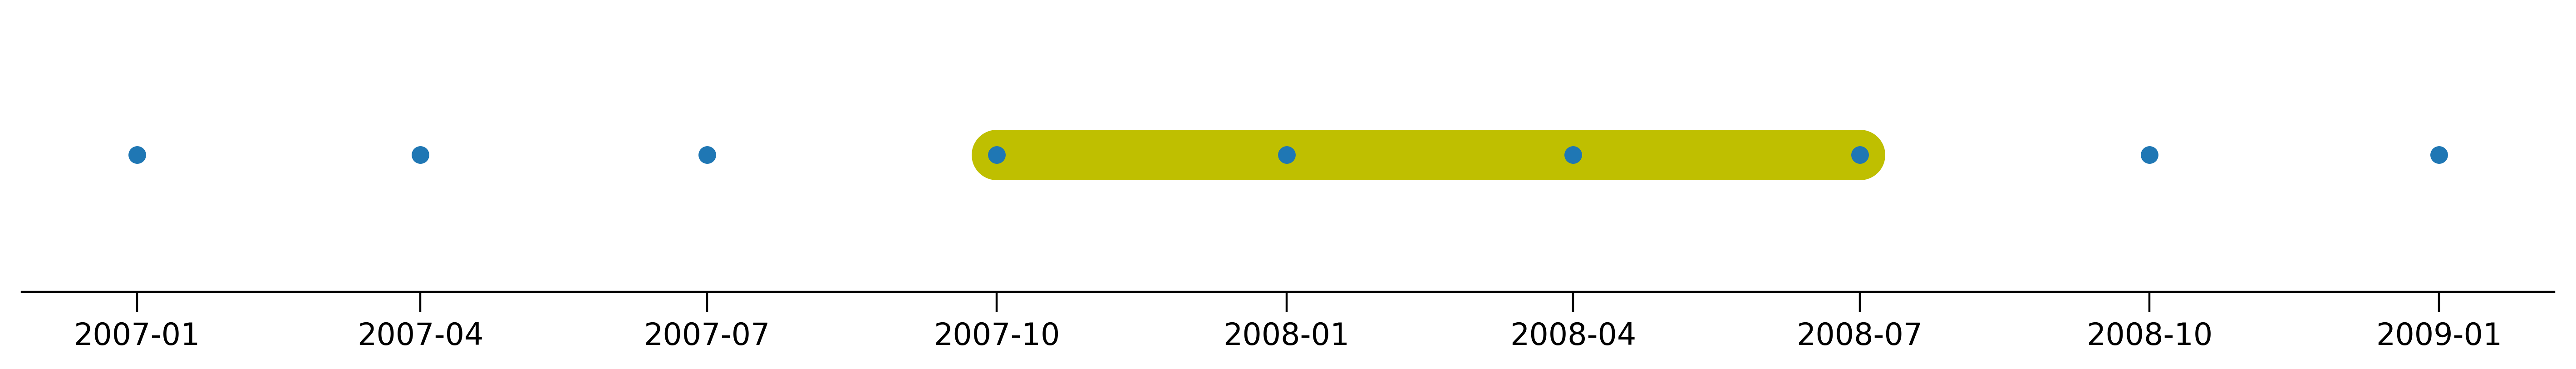

In [110]:
make_plot("round", linecolor='y')

## Take away
* so, we can see with the above example a few things, (1) that we can express the same data in a few different ways, in this case with a graph of GDP vs. time and also a timeline
* (2) we also notice that even small things like how we terminate lines in plots can have a significant effect on the information a viewer takes away from a plot => whether or not the GDP is high (or low, though we never even saw the low point!) outside of our actual measurement points or not

## Note, we can also do plots like the above by reading in data from a file
* Lets read in the same GDP data
* go to: https://fred.stlouisfed.org/series/GDP to download the data
* click on the "Download" and select CSV

In [167]:
# there are several ways to read in CSV files that we will use throughout the course
# but right now, we'll just make ourselves a little converter like so:
def converter(v):
    #print(v, v.decode("ascii"))
    return datetime.strptime(v.decode("ascii"), '%Y-%m-%d')

In [168]:
# now where is my file located?  One way to do this is open a terminal to look
# *** DO this step through the window

# Note: if you are on a windows, you will have a different filepath
#  Can someone with a windows machine post in the chat what their filepath looks like
#  so folks can see it?
myFredFile = "/Users/jillnaiman1/Downloads/GDP.csv"

# we're going to use loadtxt to load this file from numpy, but we want give each 
# column a name & data type:
myFredType = np.dtype([("date", datetime), ("gdp", np.float64)])

# now all that is left to do is read in the thing!
with open(myFredFile, "r") as f:
    data = np.loadtxt(f, skiprows=1, delimiter=",", converters={0: converter}, dtype=myFredType)
    
#print(data)
    

In [169]:
# now lets again make a cool plotting routine
def make_gdp_plot(style): # note, "style" is something you can gooogle if you want more options
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_title("Style: %s" % style)
        ax.plot_date(data["date"], data["gdp"], '-')
        plt.show()

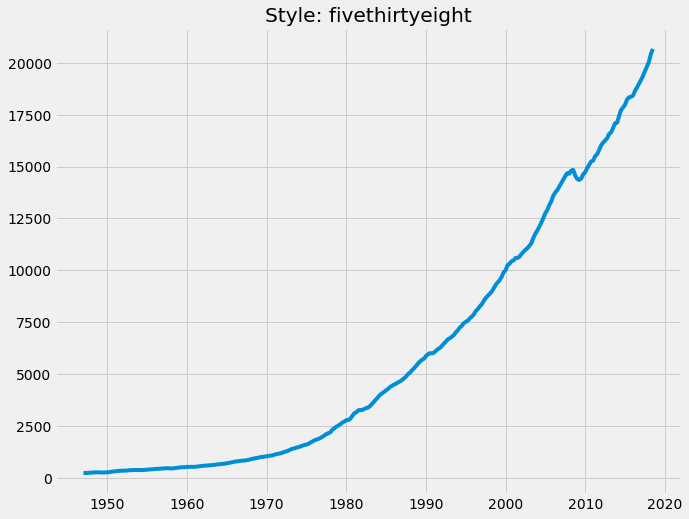

2007-01-01 00:00:00
2007-04-01 00:00:00
2007-07-01 00:00:00
2007-10-01 00:00:00
2008-01-01 00:00:00
2008-04-01 00:00:00
2008-07-01 00:00:00
2008-10-01 00:00:00
2009-01-01 00:00:00
2009-04-01 00:00:00
2009-07-01 00:00:00
2009-10-01 00:00:00
2010-01-01 00:00:00
2010-04-01 00:00:00
2010-07-01 00:00:00
2010-10-01 00:00:00
2011-01-01 00:00:00
2011-04-01 00:00:00
2011-07-01 00:00:00
2011-10-01 00:00:00


In [170]:
make_gdp_plot('fivethirtyeight')

In [171]:
# we can also of course look at the values just by eye
for v in data["date"][240:260]: print(v)
# note that the zeros in the 2nd column are just the assumption that the data was taken at midnight

2007-01-01 00:00:00
2007-04-01 00:00:00
2007-07-01 00:00:00
2007-10-01 00:00:00
2008-01-01 00:00:00
2008-04-01 00:00:00
2008-07-01 00:00:00
2008-10-01 00:00:00
2009-01-01 00:00:00
2009-04-01 00:00:00
2009-07-01 00:00:00
2009-10-01 00:00:00
2010-01-01 00:00:00
2010-04-01 00:00:00
2010-07-01 00:00:00
2010-10-01 00:00:00
2011-01-01 00:00:00
2011-04-01 00:00:00
2011-07-01 00:00:00
2011-10-01 00:00:00


In [172]:
# and here is how things look for the gdp
for v in data["gdp"][240:260]: print(v)

14208.569
14382.363
14535.003
14681.501
14651.039
14805.611
14835.187
14559.543
14394.547
14352.85
14420.312
14628.021
14721.35
14926.098
15079.917
15240.843
15285.828
15496.189
15591.85
15796.46


# ------- WE GOT TO HERE IN LECTURE 1 -------

## We can also use python to make diagrams
* This uses matplotlib.patches

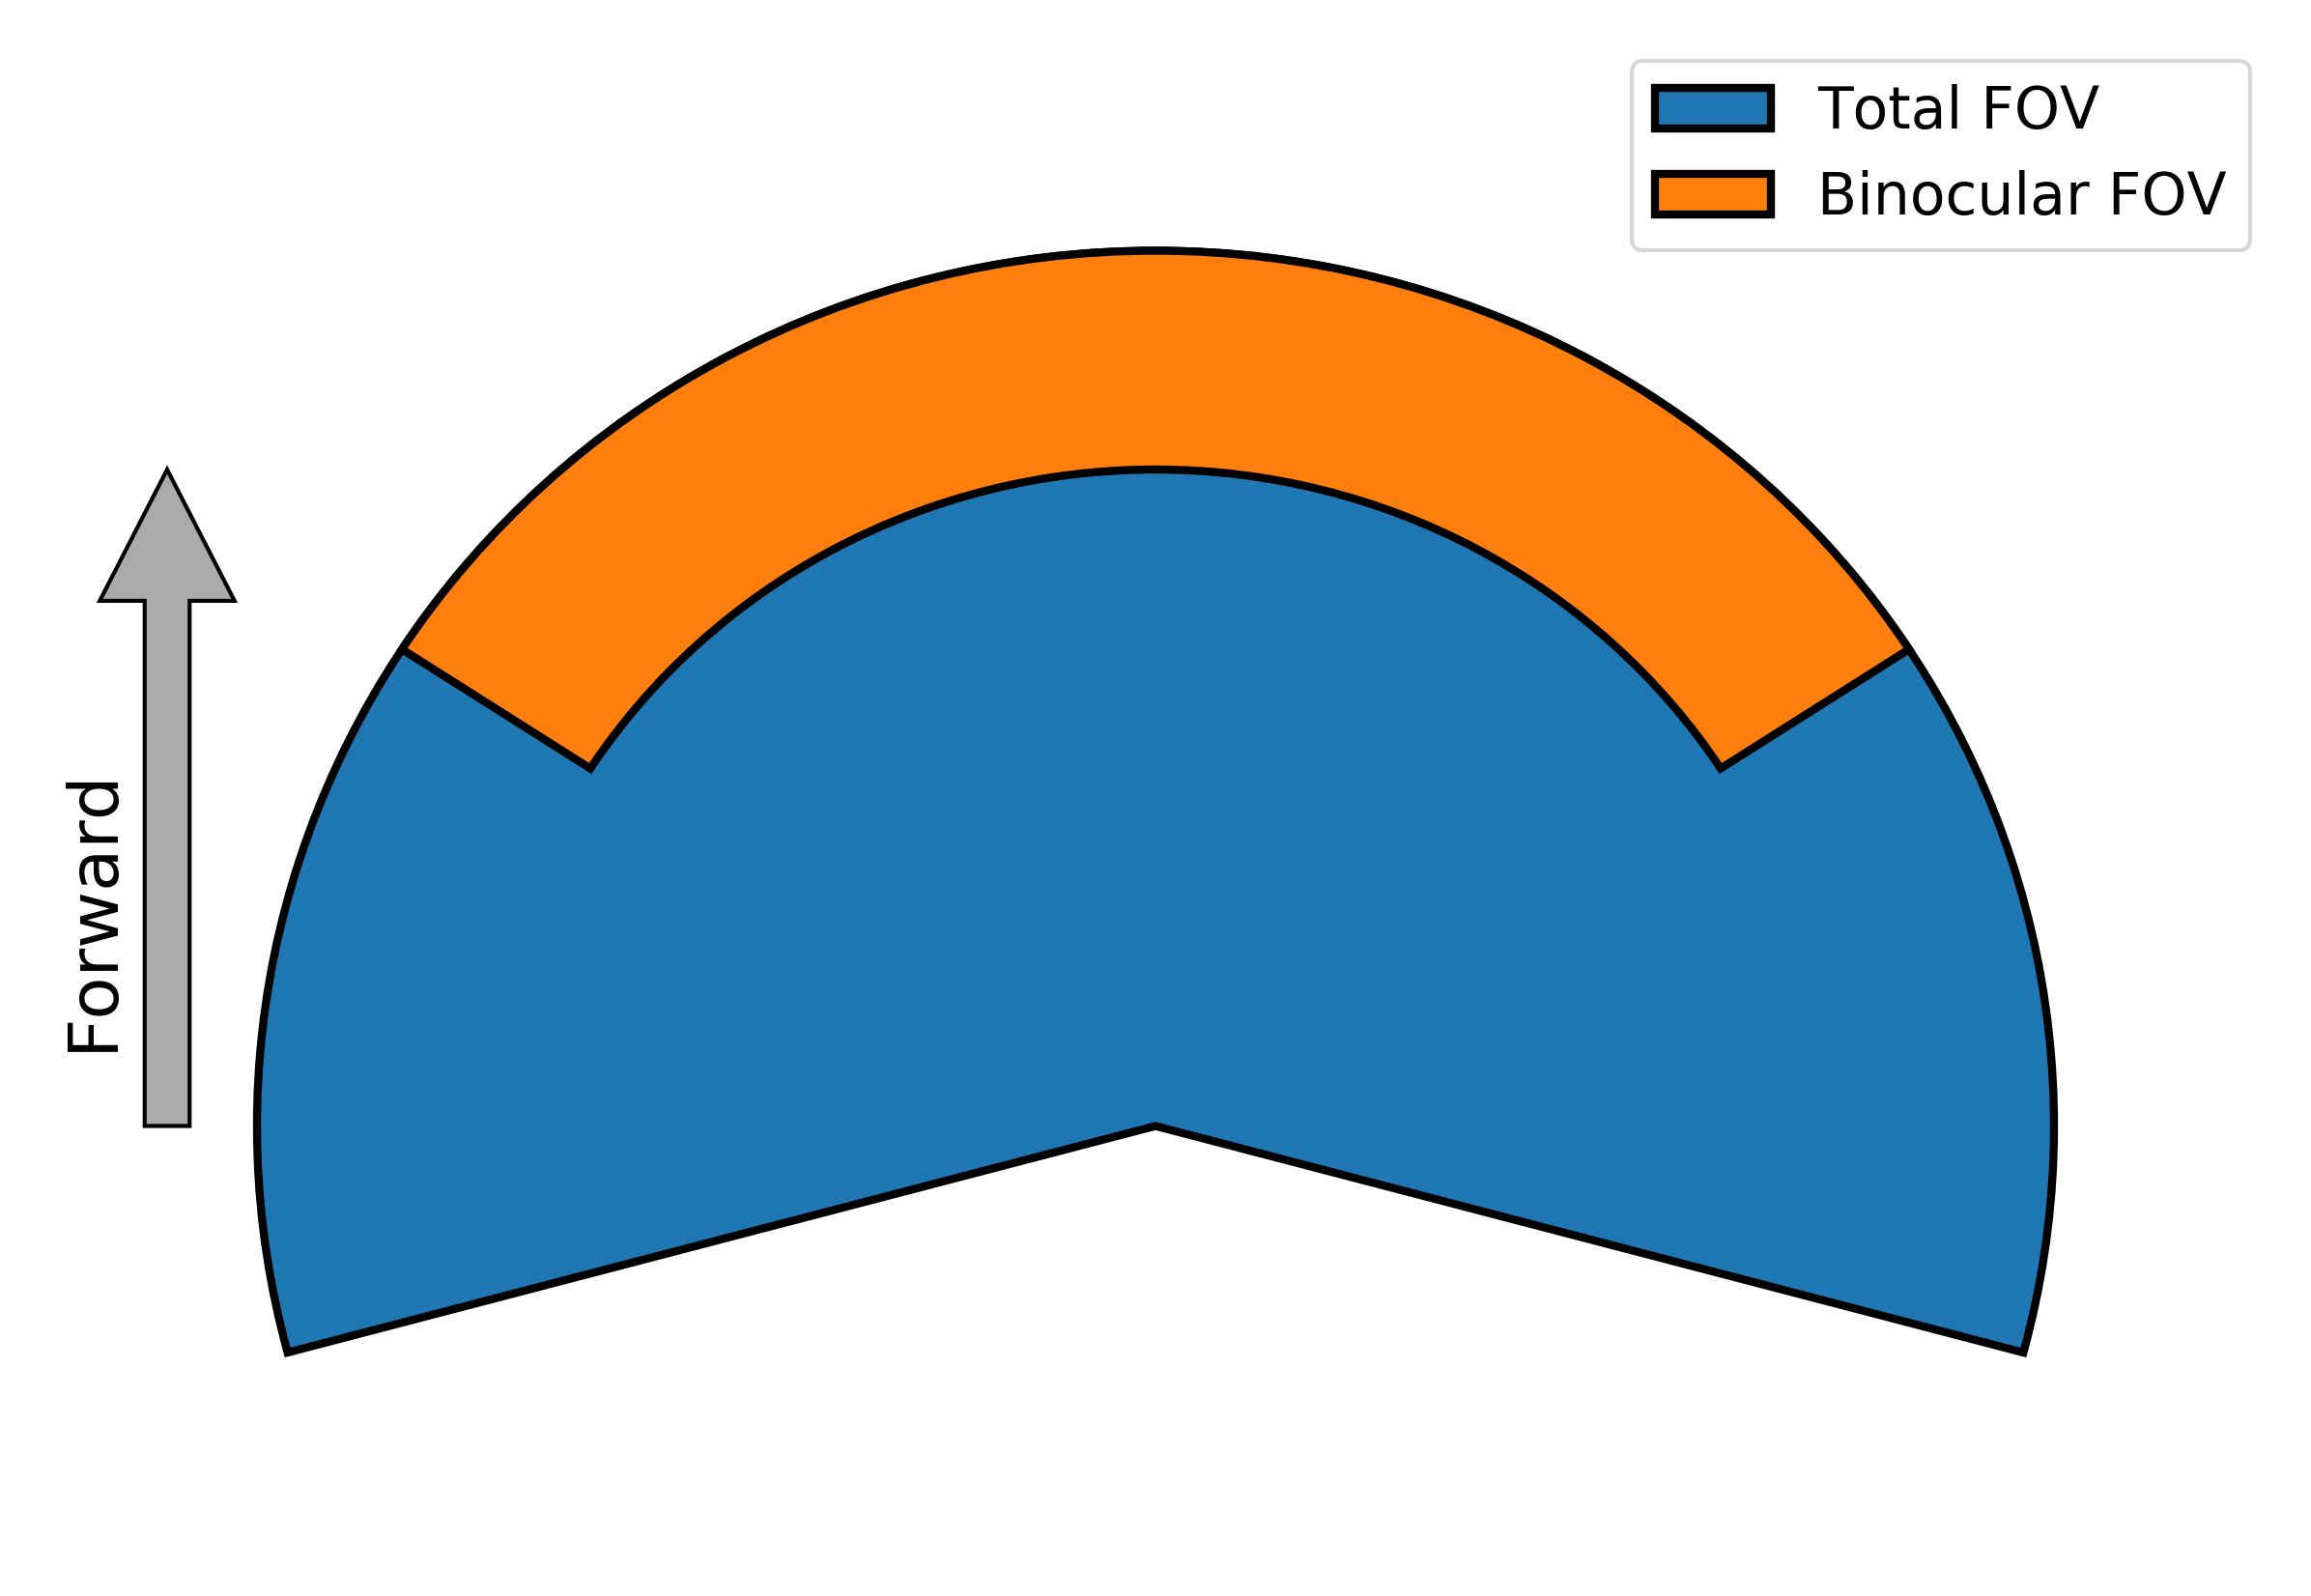

In [181]:
# lets re-do that diagram of the angular distribution of human vision we had in the slides

# make edge color for our patches black
edgecolor = "#000000"
# note, the above uses the standard hex codes for colors
#  we'll talk a bit about this later, but you can also just google "hex color codes", like so:
# https://www.color-hex.com/

# lets color our patches like what is in the slide
facecolor_totalFOV = "#1f77b4" # blueish
facecolor_bincFOV = "#ff7f0e" # orangish

# NOTE: do plt.show after each step!!

# (1)
totalFOV = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (210/2.0), 90 + (210/2.0), # span of the wedge
                                    lw=2.0, 
                                    facecolor=facecolor_totalFOV, 
                                    edgecolor=edgecolor)

# (3) lets put this other wedge definition up here with the totalFOV one for consistency
binoc = matplotlib.patches.Wedge([0.0, 0.0], 1.0, 90 - (114/2.0), 90 + (114/2.0), 
                                 width=0.25, # so that it doesn't overlap totally with total FOV
                                 lw=2.0, 
                                 facecolor=facecolor_bincFOV, edgecolor=edgecolor)

# (5) Finally, if we remember back to the figure, there was an arrow dictating 
#     the forward direction
facecolor_arrow = "#aaaaaa"
arrow = matplotlib.patches.Arrow(-1.10, 0.0, 0.0, 0.75, 
                                 width=0.25, edgecolor=edgecolor, 
                                 facecolor=facecolor_arrow)#, label="forward")


# (1)
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
ax.add_patch(totalFOV)
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-0.5, 1.25)

# (3)
ax.add_patch(binoc)

# (5)
ax.add_patch(arrow)

# (6) Finally, lets overplot the arrow's notatoin
plt.text(-1.22, 0.35, "Forward", rotation=90, fontsize="xx-large")


# (4) lets also add a legend to remind us what is what
ax.legend([horizontal, binoc], ["Total FOV", "Binocular FOV"], fontsize="x-large")


# (2) lets disappear the axis & ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## Take away
* so, that was a lot of effort (maybe) to make a diagram, *but* we can now go back and change things very easily 
* for example we can change all the colors **do this**, or we can change the size of the wedge
* the take away is that Python not only makes graphs, but it can also be used to make diagrams

## Python can also be used to manipulate images
* lets try with our stitch image

## ------ NOTE: BELOW DOESN'T NEED TO BE RUN TO FIX IMAGE ------

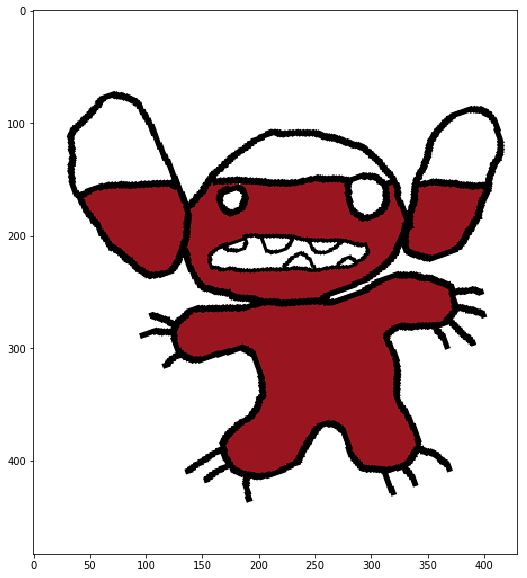

In [255]:
# note: for this to work you might have to install pillow
#  either with pip: pip3 install pillow (might have to use sudo)
#  or anaconda: conda install -c anaconda pillow 
# Also, I think there is a way to do it using the GUI, but I've never used the Anaconda GUI to install things before
import PIL.Image as Image
#data = np.array(Image.open("https://uiuc-ischool-dataviz.github.io/spring2019online/week01/images/stitch_nobg_tilted.png", "r"))
im = Image.open("/Users/jillnaiman1/spring2019online/week01/images/stitch_nobg_tilted.png", "r")

# lets check out our figure
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(im)


In [256]:
# now, lets turn this image into a numpy array
data = np.array(im)

# lets see how many colors we have
np.unique(data[:,:,0]) # check out just 1 color

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

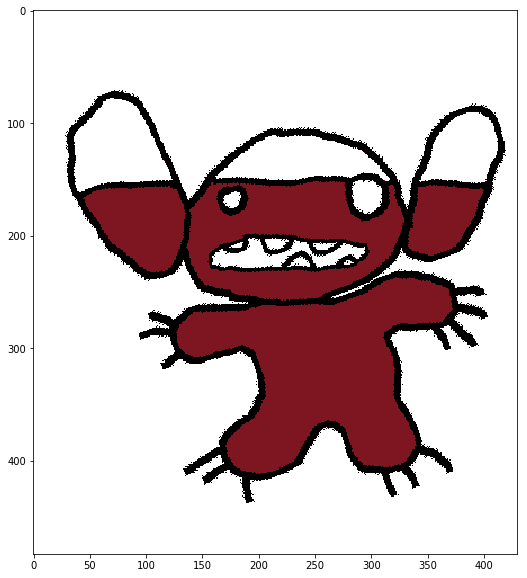

In [257]:
# so why is there a full range in a 3 color image?  
#  this is just because the pixelation has done some interpolating
# so lets fix it!

# black is given by 0,0,0
# white is 255, 255, 255

# lets go through and make all "grays" into whites
# steps are check for same values
# make sure those values aren't black
# if not, set to white
# else, if not black, set to red
for i in range(data.shape[0]):
    for j in range(data.shape[1]): # note, this is inefficient
        if (data[i,j,0] == data[i,j,1]) and (data[i,j,1] == data[i,j,2]) \
        and (data[i,j,0] > 10) and (data[i,j,1] > 10) and (data[i,j,2] > 10) and\
        data[i,j,3] != 0: # last part is a check for transparency, only want non-transparent things
            data[i,j,:] = (255,255,255,255)
        elif (data[i,j,0] < 10 and data[i,j,1]<10 and data[i,j,2]<10) and data[i,j,3] != 0: # near-blacks
            data[i,j,:] = (0,0,0,255)
        elif (data[i,j,0] != 0) and (data[i,j,1] != 0) and (data[i,j,2] != 0): # not black, not white
            data[i,j,:] = (126, 22, 33, 255) # set to opaque red!
        elif (data[i,j,3] == 0): # transparent, set to black
            data[i,j,:] = (0,0,0,0)

            
# lets check out our figure
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.fromarray(data))

im = Image.fromarray(data)
im.show()

#data            

In [258]:
np.unique(data[:,:,0])

array([  0, 126, 255], dtype=uint8)

In [259]:
# save zee image
im.save("/Users/jillnaiman1/spring2019online/week01/images/stitch_reworked.png")

## ------- DONE REWORKING IMAGE ------

In [274]:
# note: for this to work you might have to install pillow
#  either with pip: pip3 install pillow (might have to use sudo)
#  or anaconda: conda install -c anaconda pillow 
# Also, I think there is a way to do it using the GUI, but I've never used the Anaconda GUI to install things before
import PIL.Image as Image
#data = np.array(Image.open("https://uiuc-ischool-dataviz.github.io/spring2019online/week01/images/stitch_nobg_tilted.png", "r"))
im = Image.open("/Users/jillnaiman1/Downloads/stitch_reworked.png", "r")

data = np.array(im)

In [275]:
np.unique(data[:,:,0])
# so we see there are only 3 colors

array([  0, 126, 255], dtype=uint8)

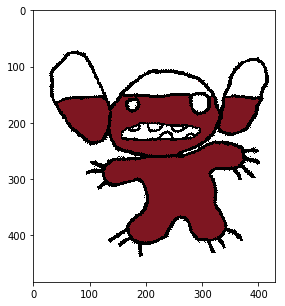

In [263]:
# lets remind ourselves a bit of what this looks like
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(im)

In [264]:
# lets now use pixel filling to determine the volumetric good and bad levels
ngood = (data[:,:,0] == 255).sum() # number of "good" pixels
nbad = (data[:,:,0] == 126).sum() # number of "bad" pixels
total = ngood + nbad
badness = nbad / total
goodness = ngood/  total
print(badness, goodness)

# so, looks like ~77% bad and 23% good
# does that match up with what you'd think from looking at the above figure?

0.774405234691176 0.22559476530882408


(0.0, 2.0)

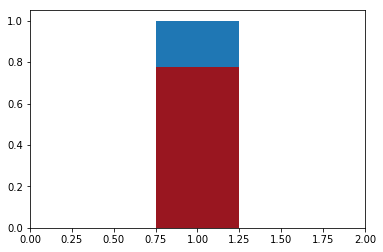

In [265]:
# now, lets plot this thing on a little bar graph!
p1 = plt.bar([1], badness, [0.5], color='#991620')
p2 = plt.bar([1], goodness, [0.5], bottom=badness)
plt.xlim(0.0, 2.0)

In [268]:
# what if we just counted pixes from our figure above?
# looks like good changes to badness at ~150
# image top is at ~50 pixels
# image bottom is at ~450 pixels

# so:
goodness_apparent = (50-150)/(50-450)

# 372 pixels for full height, 72 for goodness
#goodness_apparent = 79./362.

In [269]:
print(goodness_apparent)

0.25


In [273]:
# what is badness, apparent
1.0-goodness_apparent

0.75

([<matplotlib.patches.Wedge at 0x11c514518>,
 [Text(-0.8351102665775723, 0.7159544976161101, ''),
  Text(0.8351102665775721, -0.7159544976161102, '')])

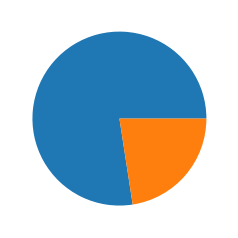

In [276]:
plt.pie([badness,goodness]) # can also do a pie chart if we want I suppose :D